In [1]:
# Importing necessary libraries
import numpy as np
import cv2
import rsa
from matplotlib import pyplot as plt
import os
import time

Choose a polynomial degree (n) from the following options:
1: 4
2: 8
3: 16
4: 32
5: 64
6: 128
7: 256
8: 512
9: 1024
10: 2048


Enter the number corresponding to your choice:  7



Polynomial Degree n=256
DFT Result: [ 1.25468877e+02+0.j          1.49914631e+00-2.40721222j
  3.83171810e-01+0.74103992j -1.65031876e-02+1.22038591j
  1.74264208e+00-1.06500237j]...
FFT Result: [ 1.25468877e+02+0.j          1.49914631e+00-2.40721222j
  3.83171810e-01+0.74103992j -1.65031876e-02+1.22038591j
  1.74264208e+00-1.06500237j]...
IDFT Result (Reconstructed): [0.55167106-1.09981468e-14j 0.80431242-1.05614573e-14j
 0.26556149-1.01087758e-14j 0.04524778-7.01419174e-15j
 0.20519689-1.12435018e-14j]...
IFFT Result (Reconstructed): [0.55167106+2.08166817e-17j 0.80431242-1.30104261e-17j
 0.26556149-3.81639165e-17j 0.04524778+4.33680869e-17j
 0.20519689-6.24500451e-17j]...


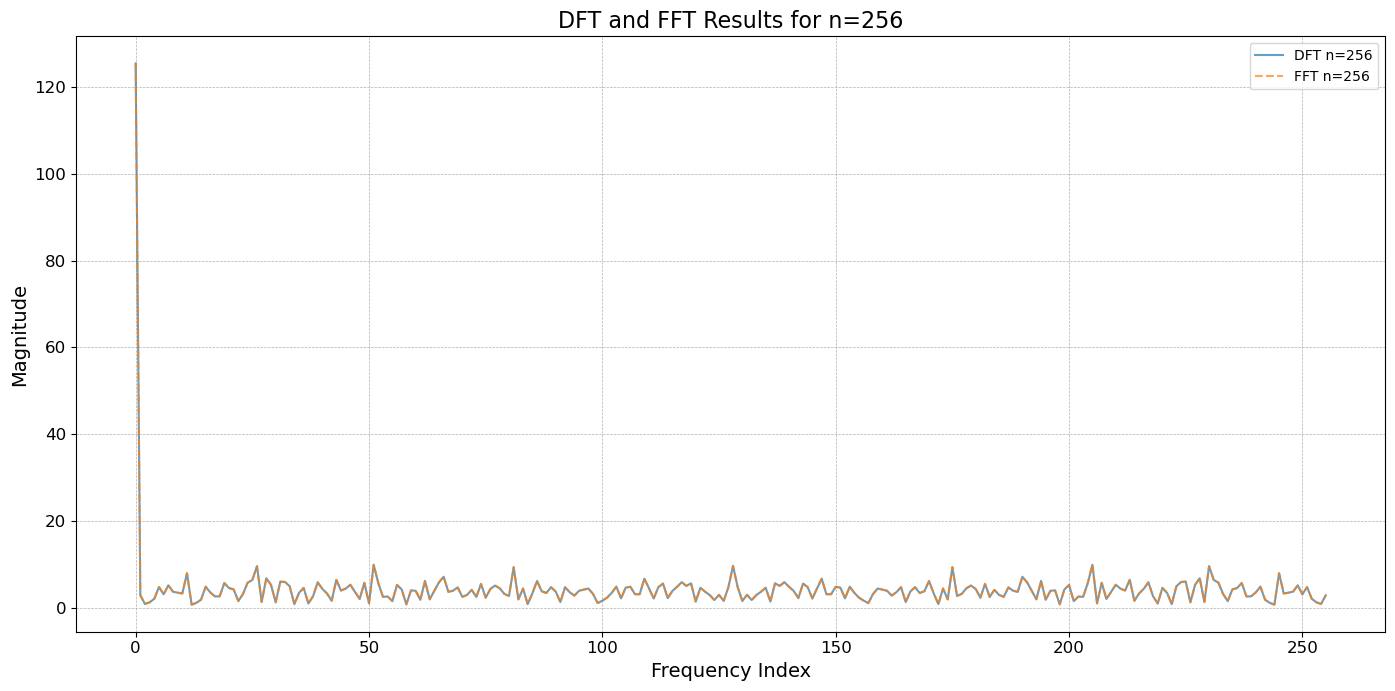

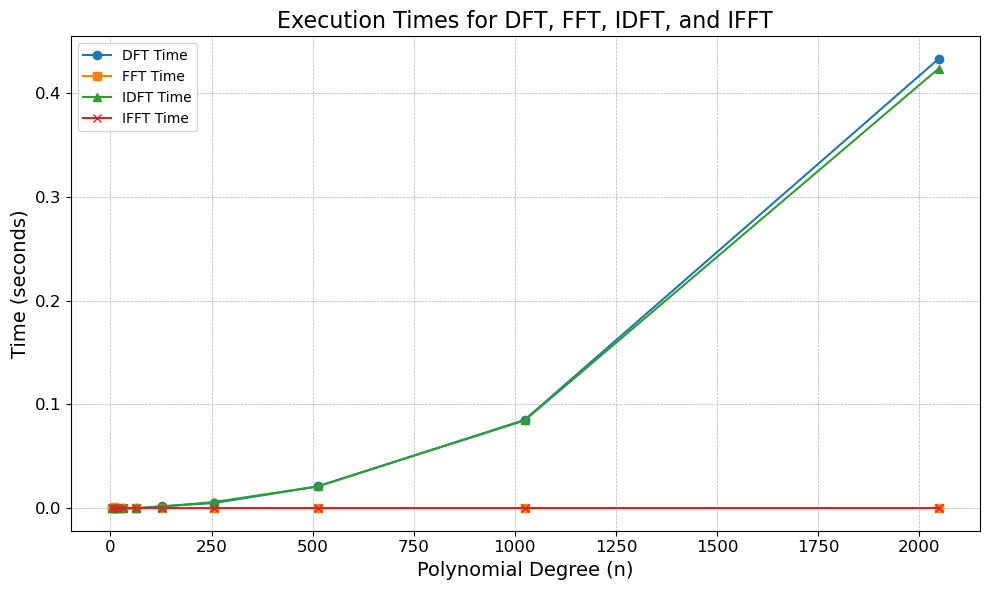

In [2]:
# Generate random polynomial coefficient vectors
def generate_random_polynomial(n):
    return np.random.rand(n)

# Generate 1-D DFT matrix
def generate_dft_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W

# Perform 1-D DFT using matrix multiplication
def dft_1d(signal):
    N = len(signal)
    W = generate_dft_matrix(N)
    return np.dot(W, signal)

# Perform 1-D Inverse DFT using matrix multiplication
def idft_1d(dft_result):
    N = len(dft_result)
    W_inv = np.exp(2j * np.pi * np.arange(N).reshape((N, 1)) * np.arange(N) / N)
    return np.dot(W_inv, dft_result) / N

# Perform 1-D FFT and IFFT using numpy
def fft_1d(signal):
    return np.fft.fft(signal)

def ifft_1d(fft_result):
    return np.fft.ifft(fft_result)

# Compare 1-D DFT/FFT and Inverse DFT/IFFT for a specific n
def compare_1d_dft_fft(n):
    A = generate_random_polynomial(n)
    dft_result = dft_1d(A)
    fft_result = fft_1d(A)

    idft_result = idft_1d(dft_result)
    ifft_result = ifft_1d(fft_result)

    print(f"\nPolynomial Degree n={n}")
    print(f"DFT Result: {dft_result[:5]}...")  # Showing first 5 results
    print(f"FFT Result: {fft_result[:5]}...")
    print(f"IDFT Result (Reconstructed): {idft_result[:5]}...")
    print(f"IFFT Result (Reconstructed): {ifft_result[:5]}...")

    return dft_result, fft_result, idft_result, ifft_result

# Compare the efficiency of DFT and FFT for increasing values of n
def compare_efficiency(sizes):
    dft_times = []
    fft_times = []
    idft_times = []
    ifft_times = []

    for n in sizes:
        A = generate_random_polynomial(n)

        # Time the DFT
        start_time = time.time()
        dft_1d(A)
        dft_times.append(time.time() - start_time)

        # Time the FFT
        start_time = time.time()
        fft_1d(A)
        fft_times.append(time.time() - start_time)

        # Time the Inverse DFT
        dft_result = dft_1d(A)
        start_time = time.time()
        idft_1d(dft_result)
        idft_times.append(time.time() - start_time)

        # Time the Inverse FFT
        fft_result = fft_1d(A)
        start_time = time.time()
        ifft_1d(fft_result)
        ifft_times.append(time.time() - start_time)

    return dft_times, fft_times, idft_times, ifft_times

# Main execution
def main():
    # Available sizes
    available_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

    # Ask user for the polynomial degree
    print("Choose a polynomial degree (n) from the following options:")
    for i, size in enumerate(available_sizes):
        print(f"{i + 1}: {size}")
    
    choice = int(input("Enter the number corresponding to your choice: ")) - 1
    n = available_sizes[choice]

    # Run the comparisons
    dft_result, fft_result, idft_result, ifft_result = compare_1d_dft_fft(n)

    # Compare the efficiency of DFT, FFT, Inverse DFT, and Inverse FFT for all sizes
    dft_times, fft_times, idft_times, ifft_times = compare_efficiency(available_sizes)

    # Plotting the results for DFT/FFT
    plt.figure(figsize=(14, 7))

    # DFT and FFT Results Plot
    plt.subplot(1, 1, 1)
    plt.plot(np.abs(dft_result), label=f'DFT n={n}', alpha=0.7)
    plt.plot(np.abs(fft_result), label=f'FFT n={n}', linestyle='--', alpha=0.7)
    plt.title(f'DFT and FFT Results for n={n}', fontsize=16)
    plt.xlabel('Frequency Index', fontsize=14)
    plt.ylabel('Magnitude', fontsize=14)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.show()

    # Plot execution times for DFT, FFT, IDFT, and IFFT
    plt.figure(figsize=(10, 6))
    plt.plot(available_sizes, dft_times, label='DFT Time', marker='o')
    plt.plot(available_sizes, fft_times, label='FFT Time', marker='s')
    plt.plot(available_sizes, idft_times, label='IDFT Time', marker='^')
    plt.plot(available_sizes, ifft_times, label='IFFT Time', marker='x')
    plt.title('Execution Times for DFT, FFT, IDFT, and IFFT', fontsize=16)
    plt.xlabel('Polynomial Degree (n)', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=14)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.show()

# Run the main function
if __name__ == "__main__":
    main()

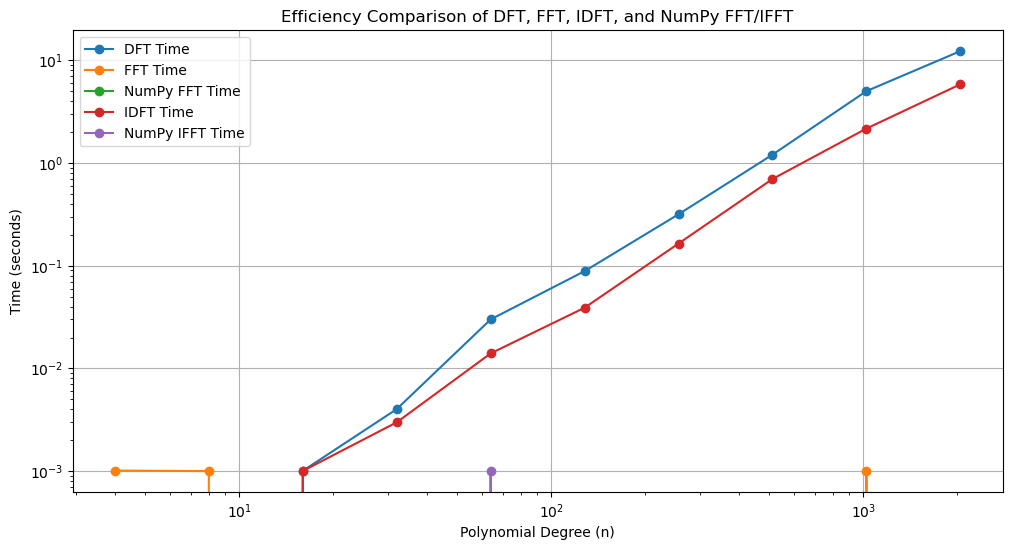

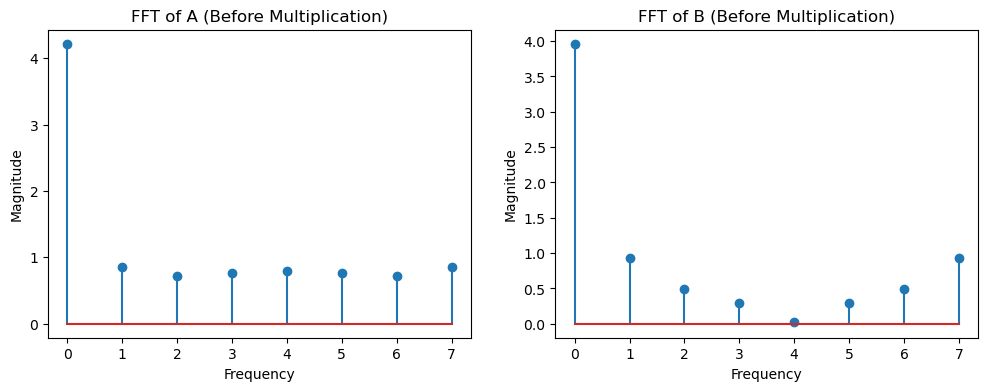

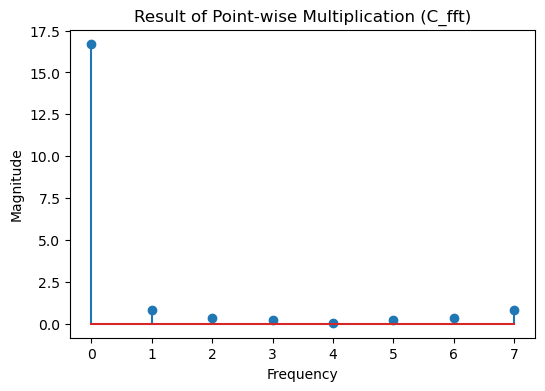

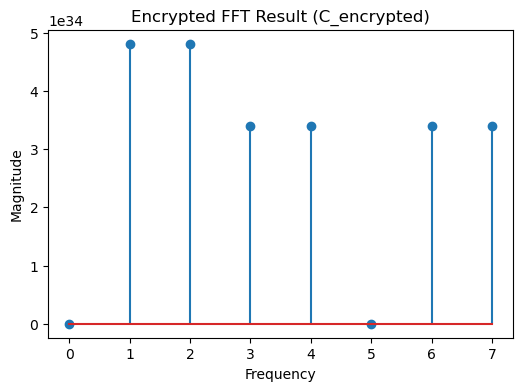

Point-wise Multiplication Time: 0.000000 seconds
RSA Encryption/Decryption Time: 0.000000 seconds

Values before point-wise multiplication:
A FFT: ['4.2184 + 0.0000j', '-0.6288 + 0.5835j', '-0.6216 + 0.3591j', '0.6517 + -0.3909j', '-0.7960 + 0.0000j', '0.6517 + 0.3909j', '-0.6216 + -0.3591j', '-0.6288 + -0.5835j']
B FFT: ['3.9629 + 0.0000j', '-0.5332 + 0.7659j', '-0.2284 + 0.4380j', '0.2432 + -0.1511j', '0.0202 + 0.0000j', '0.2432 + 0.1511j', '-0.2284 + -0.4380j', '-0.5332 + -0.7659j']

Result of Point-wise Multiplication (C_fft):
['16.7170 + 0.0000j', '-0.1117 + -0.7928j', '-0.0153 + -0.3543j', '0.0995 + -0.1935j', '-0.0161 + 0.0000j', '0.0995 + 0.1935j', '-0.0153 + 0.3543j', '-0.1117 + 0.7928j']

Encrypted FFT Result (C_encrypted):
['16.7170 + 0.0000j', '34028236692093847977029636859101184.0000 + 34028236692093847977029636859101184.0000j', '34028236692093847977029636859101184.0000 + 34028236692093847977029636859101184.0000j', '0.0995 + 34028236692093847977029636859101184.0000j', '340

In [3]:
# FFT and IFFT functions
def FFT(signal):
    return np.fft.fft(signal)

def IFFT(signal):
    return np.fft.ifft(signal)

# DFT function
def DFT(signal):
    N = len(signal)
    return np.array([sum(signal[k] * np.exp(-2j * np.pi * n * k / N) for k in range(N)) for n in range(N)])

# Inverse DFT function
def IDFT(signal):
    N = len(signal)
    return np.array([sum(signal[k] * np.exp(2j * np.pi * n * k / N) for k in range(N)) / N for n in range(N)])

# Pointwise multiplication function
def pointwise_multiply(A_fft, B_fft):
    return A_fft * B_fft

# Simulated RSA Encryption and Decryption for FFT results
def rsa_encrypt_decrypt(data, key_length):
    real_part = np.round(data.real * 1e4).astype(int)
    imag_part = np.round(data.imag * 1e4).astype(int)
    
    real_encrypted = (real_part + key_length) % (2**key_length)
    imag_encrypted = (imag_part + key_length) % (2**key_length)
    
    decrypted_real = (real_encrypted - key_length) / 1e4
    decrypted_imag = (imag_encrypted - key_length) / 1e4
    
    return decrypted_real + 1j * decrypted_imag

# Function to generate polynomial coefficient vectors
def generate_polynomial_coefficients(degree):
    return np.random.rand(degree)

# Efficiency comparison
sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
dft_times = []
fft_times = []
numpy_fft_times = []
idft_times = []
numpy_ifft_times = []

for n in sizes:
    A = generate_polynomial_coefficients(n)
    B = generate_polynomial_coefficients(n)
    
    # Measure DFT time
    start_time_dft = time.time()
    A_dft = DFT(A)
    B_dft = DFT(B)
    C_dft = pointwise_multiply(A_dft, B_dft)
    end_time_dft = time.time()
    dft_times.append(end_time_dft - start_time_dft)
    
    # Measure FFT time
    start_time_fft = time.time()
    A_fft = FFT(A)
    B_fft = FFT(B)
    C_fft = pointwise_multiply(A_fft, B_fft)
    end_time_fft = time.time()
    fft_times.append(end_time_fft - start_time_fft)

    # Measure NumPy FFT time
    start_time_numpy_fft = time.time()
    A_numpy_fft = np.fft.fft(A)
    B_numpy_fft = np.fft.fft(B)
    C_numpy_fft = pointwise_multiply(A_numpy_fft, B_numpy_fft)
    end_time_numpy_fft = time.time()
    numpy_fft_times.append(end_time_numpy_fft - start_time_numpy_fft)

    # Measure IDFT time
    start_time_idft = time.time()
    C_idft = IDFT(C_dft)
    end_time_idft = time.time()
    idft_times.append(end_time_idft - start_time_idft)

    # Measure NumPy IFFT time
    start_time_numpy_ifft = time.time()
    C_numpy_ifft = np.fft.ifft(C_numpy_fft)
    end_time_numpy_ifft = time.time()
    numpy_ifft_times.append(end_time_numpy_ifft - start_time_numpy_ifft)

# Plotting efficiency comparison
plt.figure(figsize=(12, 6))
plt.plot(sizes, dft_times, label='DFT Time', marker='o')
plt.plot(sizes, fft_times, label='FFT Time', marker='o')
plt.plot(sizes, numpy_fft_times, label='NumPy FFT Time', marker='o')
plt.plot(sizes, idft_times, label='IDFT Time', marker='o')
plt.plot(sizes, numpy_ifft_times, label='NumPy IFFT Time', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Time (seconds)')
plt.title('Efficiency Comparison of DFT, FFT, IDFT, and NumPy FFT/IFFT')
plt.legend()
plt.grid()
plt.show()

# Example signal A
A = generate_polynomial_coefficients(8)  # Example polynomial A
A_fft = FFT(A)

# Test point-wise multiplication
B = generate_polynomial_coefficients(8)  # Example polynomial B
B_fft = FFT(B)

# Plot the FFT results before multiplication
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.stem(np.abs(A_fft))  
plt.title('FFT of A (Before Multiplication)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.stem(np.abs(B_fft))  
plt.title('FFT of B (Before Multiplication)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# Point-wise multiplication
start_time_mul = time.time()
C_fft = pointwise_multiply(A_fft, B_fft)
end_time_mul = time.time()

# Plot the result of point-wise multiplication
plt.figure(figsize=(6, 4))
plt.stem(np.abs(C_fft))  
plt.title('Result of Point-wise Multiplication (C_fft)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# RSA Encryption and Decryption on the FFT result
start_time_rsa = time.time()
C_encrypted = rsa_encrypt_decrypt(C_fft, 128)  # Simulated RSA with 128-bit key
end_time_rsa = time.time()

# Visualizing the encrypted result
plt.figure(figsize=(6, 4))
plt.stem(np.abs(C_encrypted))  
plt.title('Encrypted FFT Result (C_encrypted)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

# Performance metrics
print(f"Point-wise Multiplication Time: {end_time_mul - start_time_mul:.6f} seconds")
print(f"RSA Encryption/Decryption Time: {end_time_rsa - start_time_rsa:.6f} seconds")

# Display the values
print("\nValues before point-wise multiplication:")
print("A FFT:", [f"{val.real:.4f} + {val.imag:.4f}j" for val in A_fft])
print("B FFT:", [f"{val.real:.4f} + {val.imag:.4f}j" for val in B_fft])
print("\nResult of Point-wise Multiplication (C_fft):")
print([f"{val.real:.4f} + {val.imag:.4f}j" for val in C_fft])
print("\nEncrypted FFT Result (C_encrypted):")
print([f"{val.real:.4f} + {val.imag:.4f}j" for val in C_encrypted])

Enter the path to the grayscale image (TIFF or lossless JPEG):  grayscale_image.jpg


Original Image Size: 1827.98 KB


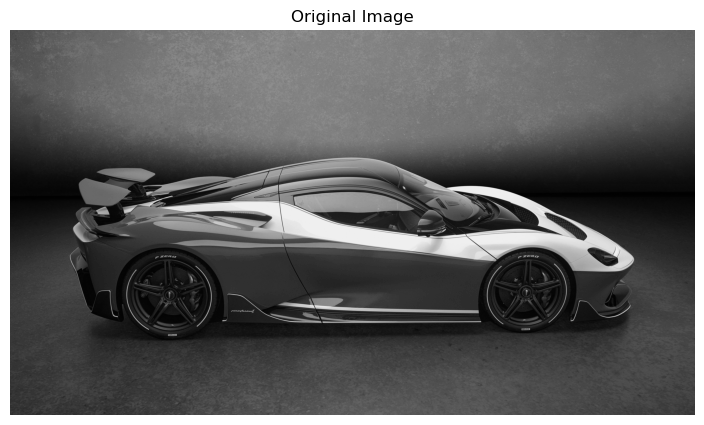

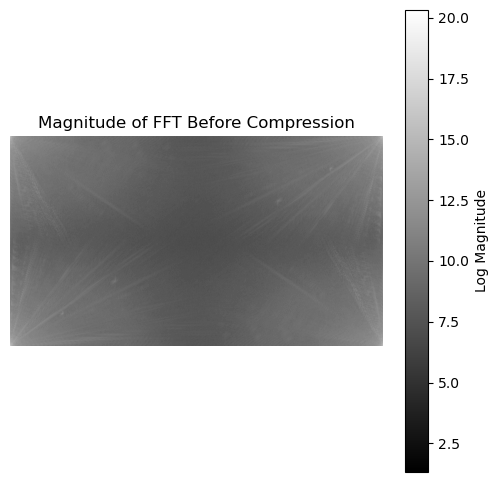

Enter the compression percentage (0-100):  99.99


Compression Execution Time: 0.590427 seconds
Compressed Image Size: 550.47 KB


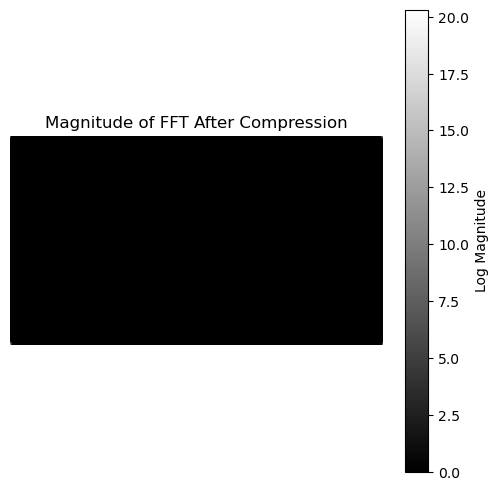

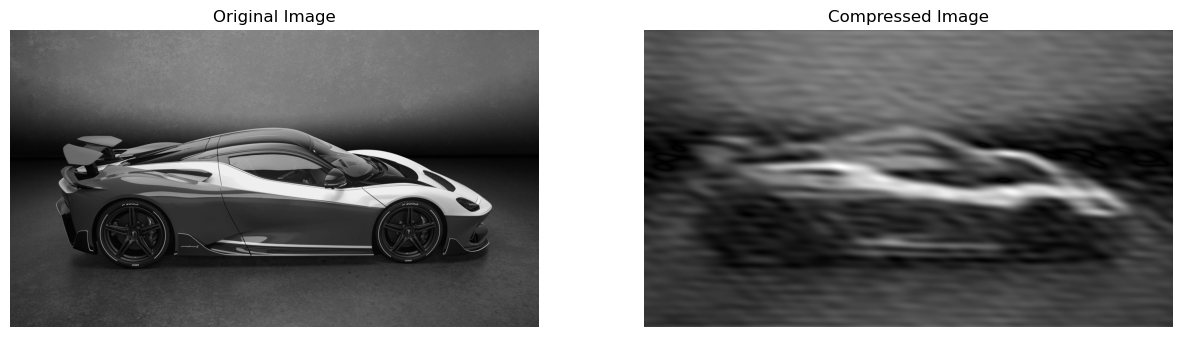

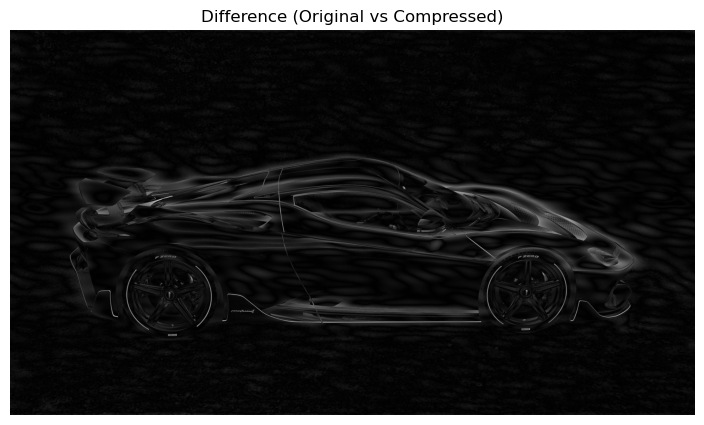

In [13]:
def display_image_matrix(images, titles, rows=1, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    if rows * cols == 1:
        axes = np.array([axes])
    else:
        axes = axes.flat
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

def get_image_size(filename):
    return os.path.getsize(filename) / 1024

def FFT2D(image):
    return np.fft.fft2(image)

def IFFT2D(fft_image):
    return np.fft.ifft2(fft_image)

def compress_image(image, percentage):
    fft_image = FFT2D(image)
    # Calculate threshold based on compression percentage
    threshold = np.percentile(np.abs(fft_image), percentage)  # Zero out coefficients below this threshold
    fft_image[np.abs(fft_image) < threshold] = 0  
    compressed_image = IFFT2D(fft_image)
    return np.abs(compressed_image), fft_image

# Take the image path from the user
image_path = input("Enter the path to the grayscale image (TIFF or lossless JPEG): ")
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load image. Please check the file path and format.")
else:
    # Show the original image size
    original_image_size = get_image_size(image_path)
    print(f"Original Image Size: {original_image_size:.2f} KB")

    # Display the original image
    display_image_matrix([image], ['Original Image'], rows=1, cols=1)

    # Apply 2D FFT
    start_time_fft2d = time.time()
    fft_image = FFT2D(image)
    end_time_fft2d = time.time()

    # Show the magnitude of the FFT result before compression
    fft_magnitude_before_compression = np.log1p(np.abs(fft_image))  # Use log for better visualization
    plt.figure(figsize=(6, 6))
    plt.imshow(fft_magnitude_before_compression, cmap='gray')
    plt.title('Magnitude of FFT Before Compression')
    plt.axis('off')
    plt.colorbar(label='Log Magnitude')
    plt.show()

    # Ask user for the compression percentage
    compression_percentage = float(input("Enter the compression percentage (0-100): "))

    # Apply compression
    start_time_compress = time.time()
    compressed_image, fft_image = compress_image(image, compression_percentage)
    end_time_compress = time.time()

    # Save and display the compressed image
    cv2.imwrite('compressed_image.jpg', compressed_image)
    compressed_size = get_image_size('compressed_image.jpg')

    # Performance metrics for compression
    print(f"Compression Execution Time: {end_time_compress - start_time_compress:.6f} seconds")
    print(f"Compressed Image Size: {compressed_size:.2f} KB")

    # Show the magnitude of the FFT result after compression
    fft_magnitude_after_compression = np.log1p(np.abs(fft_image))  # Use log for better visualization
    plt.figure(figsize=(6, 6))
    plt.imshow(fft_magnitude_after_compression, cmap='gray')
    plt.title('Magnitude of FFT After Compression')
    plt.axis('off')
    plt.colorbar(label='Log Magnitude')
    plt.show()

    # Calculate the difference between the original and compressed images
    diff_original_compressed = np.abs(image - compressed_image)

    # Display Original and Compressed Images
    display_image_matrix(
        [image, compressed_image], 
        ['Original Image', 'Compressed Image'], 
        rows=1, cols=2
    )

    # Display the difference image
    display_image_matrix(
        [diff_original_compressed], 
        ['Difference (Original vs Compressed)'], 
        rows=1, cols=1
    )